In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import json
# from matplotlib import pyplot
# import matplotlib.dates as dates
from matplotlib import pyplot as pyplot, dates
from datetime import date

# Yahoo Finance - Import yfinance package
import yfinance as yf

#functions
import finn_finance as f
from finn_finance import crypto_account

today = date.today()
day_1 = datetime.timedelta(1)
yesterday = today - day_1
get_yesterday = yesterday.strftime("%Y-%m-%d")


In [2]:
file = 'Coinbase-61c7c47cc8f40cd7a72cd6da-TransactionsHistoryReport-2022-09-10-23-11-52.csv'
data_coin = pd.read_csv(file, header=3)
data_coin


,Timestamp,Transaction Type,Asset,Quantity Transacted,Spot Price Currency,Spot Price at Transaction,Subtotal,Total (inclusive of fees and/or spread),Fees and/or Spread,Notes
0,2022-01-03T15:29:36Z,Buy,BTC,0.000213,USD,46958.63,10.00,10.00,0.00,Bought 0.00021295 BTC for $10.00 USD
1,2022-01-03T20:46:07Z,Buy,BTC,0.002105,USD,46080.04,97.01,100.00,2.99,Bought 0.00210525 BTC for $100.00 USD
2,2022-02-05T17:49:00Z,Sell,BTC,0.002294,USD,41420.14,95.00,92.01,2.99,Sold 0.00229357 BTC for $92.01 USD
3,2022-04-05T01:15:43Z,Buy,BTC,0.002076,USD,46726.59,97.01,100.00,2.99,Bought 0.00207612 BTC for $100.00 USD
4,2022-05-01T00:01:41Z,Buy,BTC,0.005207,USD,37837.50,197.01,200.00,2.99,Bought 0.00520674 BTC for $200.00 USD
5,2022-05-10T00:59:27Z,Buy,BTC,0.009594,USD,30810.31,295.60,300.00,4.40,Bought 0.00959419 BTC for $300.00 USD
6,2022-06-17T18:36:50Z,Sell,BTC,0.016902,USD,20397.38,344.75,339.61,5.14,Sold 0.01690168 BTC for $339.61 USD
7,2022-07-31T22:57:59Z,Buy,BTC,0.004133,USD,23472.34,97.01,100.00,2.99,Bought 0.00413295 BTC for $100.00 USD
8,2022-08-19T15:04:08Z,Buy,BTC,0.004525,USD,21439.24,97.01,100.00,2.99,Bought 0.00452488 BTC for $100.00 USD
9,2022-08-26T22:11:46Z,Buy,BTC,0.004675,USD,20748.98,97.01,100.00,2.99,Bought 0.00467541 BTC for $100.00 USD


In [3]:
# Set Lookback
lookback_window = 90

today = datetime.date.today()
days = datetime.timedelta(lookback_window)
lookback = today - days

start_date = lookback
end_date = today
print('Start Date: '+str(start_date))
print('End Date: '+str(end_date))

Start Date: 2022-06-13
End Date: 2022-09-11


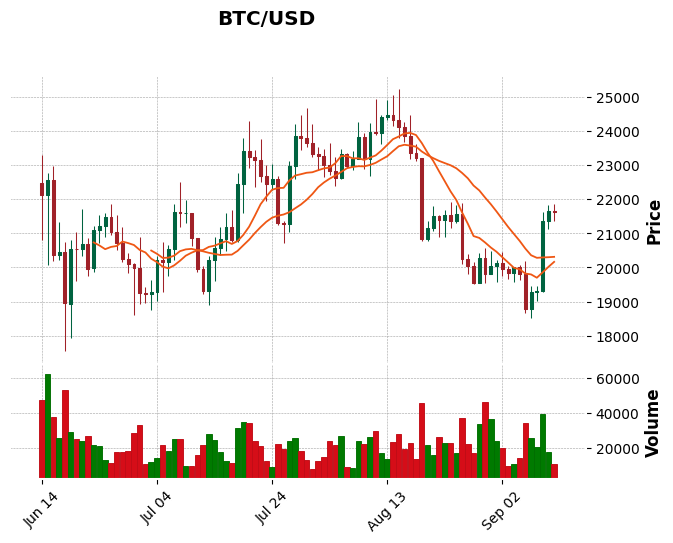

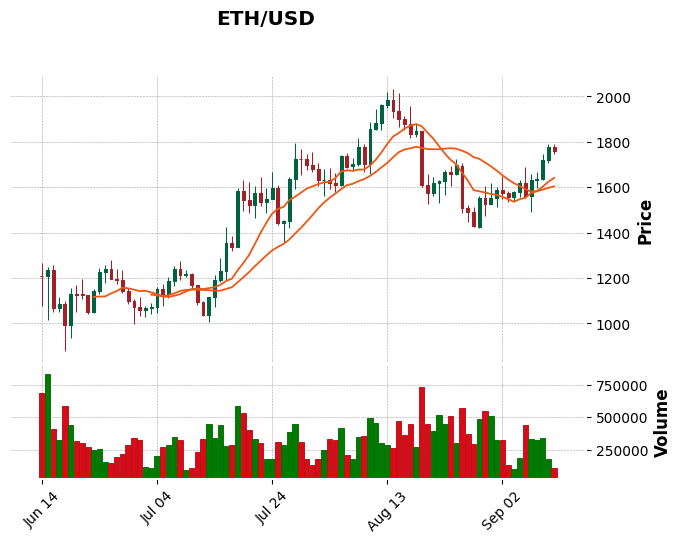

In [4]:
# Crypto data analysis
ticker_crypto = ['BTC/USD','ETH/USD']

for i in ticker_crypto:
    # Get the data
    data = f.fetch_daily_data(i)
    date_candle = pd.read_csv(data,index_col=['date'],parse_dates=True,chunksize=1000)
    date_candle = pd.concat((x.query("date > %a"%(start_date)) for x in date_candle))
    date_candle = date_candle.sort_values(by='date')

    f.candle_stick(date_candle,i)

Bitcoin Value on 2022-09-10 00:00:00: $398.806574073645


Text(0.5, 1.0, 'Bitcoin Account Value')

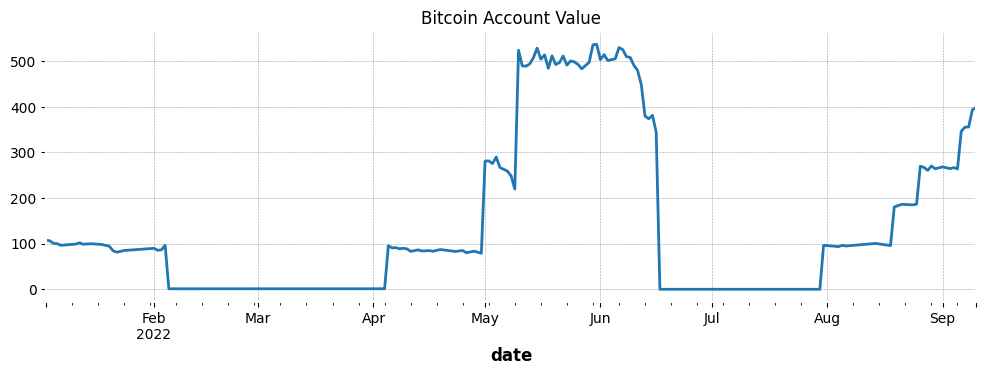

In [5]:
df_btc = crypto_account(data_coin).crypto_dollar_value(ticker='BTC/USD')

print('Bitcoin Value on '+str(df_btc.index.array[len(df_btc)-1])+': $'+str(df_btc.iloc[len(df_btc)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_btc.plot.line(legend=None)
pyplot.title('Bitcoin Account Value')

Ethereum Value on 2022-09-10 00:00:00: $206.29706726331997


Text(0.5, 1.0, 'Ethereum Account Value')

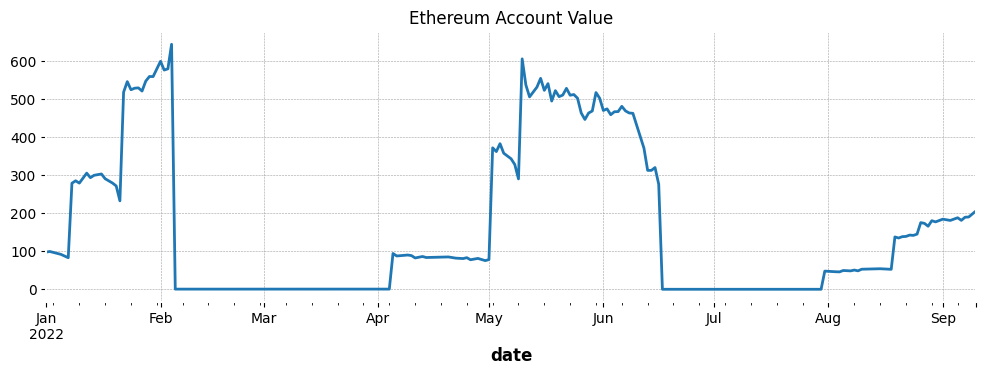

In [6]:
df_eth = crypto_account(data_coin).crypto_dollar_value(ticker='ETH/USD')

print('Ethereum Value on '+str(df_eth.index.array[len(df_eth)-1])+': $'+str(df_eth.iloc[len(df_eth)-1]['account_value']['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
df_eth.plot.line(legend=None)
pyplot.title('Ethereum Account Value')

Account Value on 2022-09-10: $605.103641336965


Text(0.5, 1.0, 'Account Value')

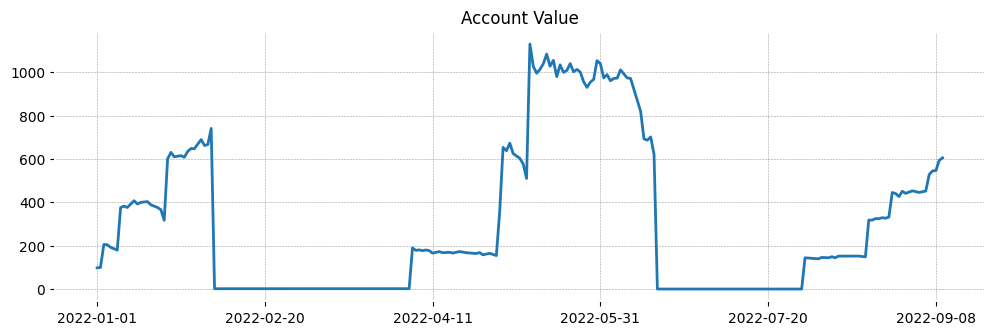

In [7]:
dff_all = crypto_account(data_coin).total_value()
dff_all

print('Account Value on '+str(dff_all.index.array[len(dff_all)-1])+': $'+str(dff_all.iloc[len(dff_all)-1]['close']))
pyplot.rcParams["figure.figsize"] = [12, 3.50]
dff_all.plot.line(legend=None)
pyplot.title('Account Value')

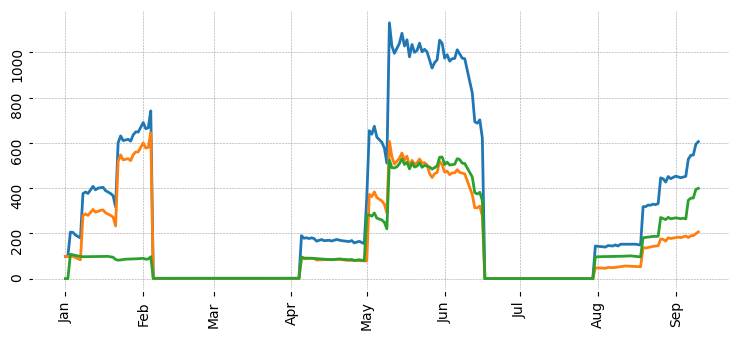

In [9]:
# Plot all 3 data frames
dff_all = crypto_account(data_coin).total_value()
df_eth = crypto_account(data_coin).crypto_dollar_value(ticker='ETH/USD')
df_btc = crypto_account(data_coin).crypto_dollar_value(ticker='BTC/USD')

date = dff_all.index

days = pd.Series(pd.date_range('20220101', periods=2))
d = [0,0]
missing_dates = pd.DataFrame({'date': days, 'close': d})
missing_dates.astype({'close': 'float64'}).dtypes
missing_dates = missing_dates.set_index('date')
df_btc_equal = pd.concat([missing_dates,df_btc['account_value']],verify_integrity=True,ignore_index=False,sort=True)

pyplot.rcParams["figure.figsize"] = [7.50, 3.50]
pyplot.rcParams["figure.autolayout"] = True
fig, ax = pyplot.subplots()
ax.plot(dff_all.index, dff_all['close'])
pyplot.plot(dff_all.index,df_eth['account_value']['close'])
pyplot.plot(dff_all.index,df_btc_equal['close'])
pyplot.tick_params(rotation=90)
months = dates.MonthLocator()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
pyplot.show()
